<a href="https://colab.research.google.com/github/helainytorres/RedesNeurais/blob/main/List3_Helainy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUC-Rio 
## Departamento de Engenharia Elétrica
## Trabalho 3 - Mapas de Kohonen

Estudante: Helainy Torres

In [22]:
!git clone https://github.com/mdrs-thiago/minisom
import os 
os.chdir('minisom')

Cloning into 'minisom'...
remote: Enumerating objects: 1789, done.
remote: Counting objects: 100% (547/547), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1789 (delta 501), reused 470 (delta 466), pack-reused 1242
Receiving objects: 100% (1789/1789), 15.65 MiB | 21.31 MiB/s, done.
Resolving deltas: 100% (996/996), done.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import minmax_scale

from minisom import MiniSom

In [24]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/PUC_Redes_Neurais/main/datasets/c_thyroid.csv')

In [25]:
values = dataset.values[:,:-1]

## Parte 1 - Testando configurações

Nesta primeira etapa, iremos investigar como a configuração do mapa pode mudar de acordo com a escolha de parâmetros. 

##### 1. Escolha os parâmetros para o primeiro teste usando SOM. Para cada parâmetro, justifique sua escolha. Avalie o resultado.

In [6]:
dataset.head()

,ResinaT3,Torixina,Triiodotironina,TSH,Diff_TSH,target
0,107.0,10.1,2.2,0.9,2.7,1.0
1,113.0,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,1.4,0.6,1.0
3,109.0,5.3,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,1.5,-0.1,1.0


In [26]:
dataset['target'].value_counts()

1.0    150
2.0     35
3.0     30
Name: target, dtype: int64

In [27]:
import seaborn as sns
sns.set() 

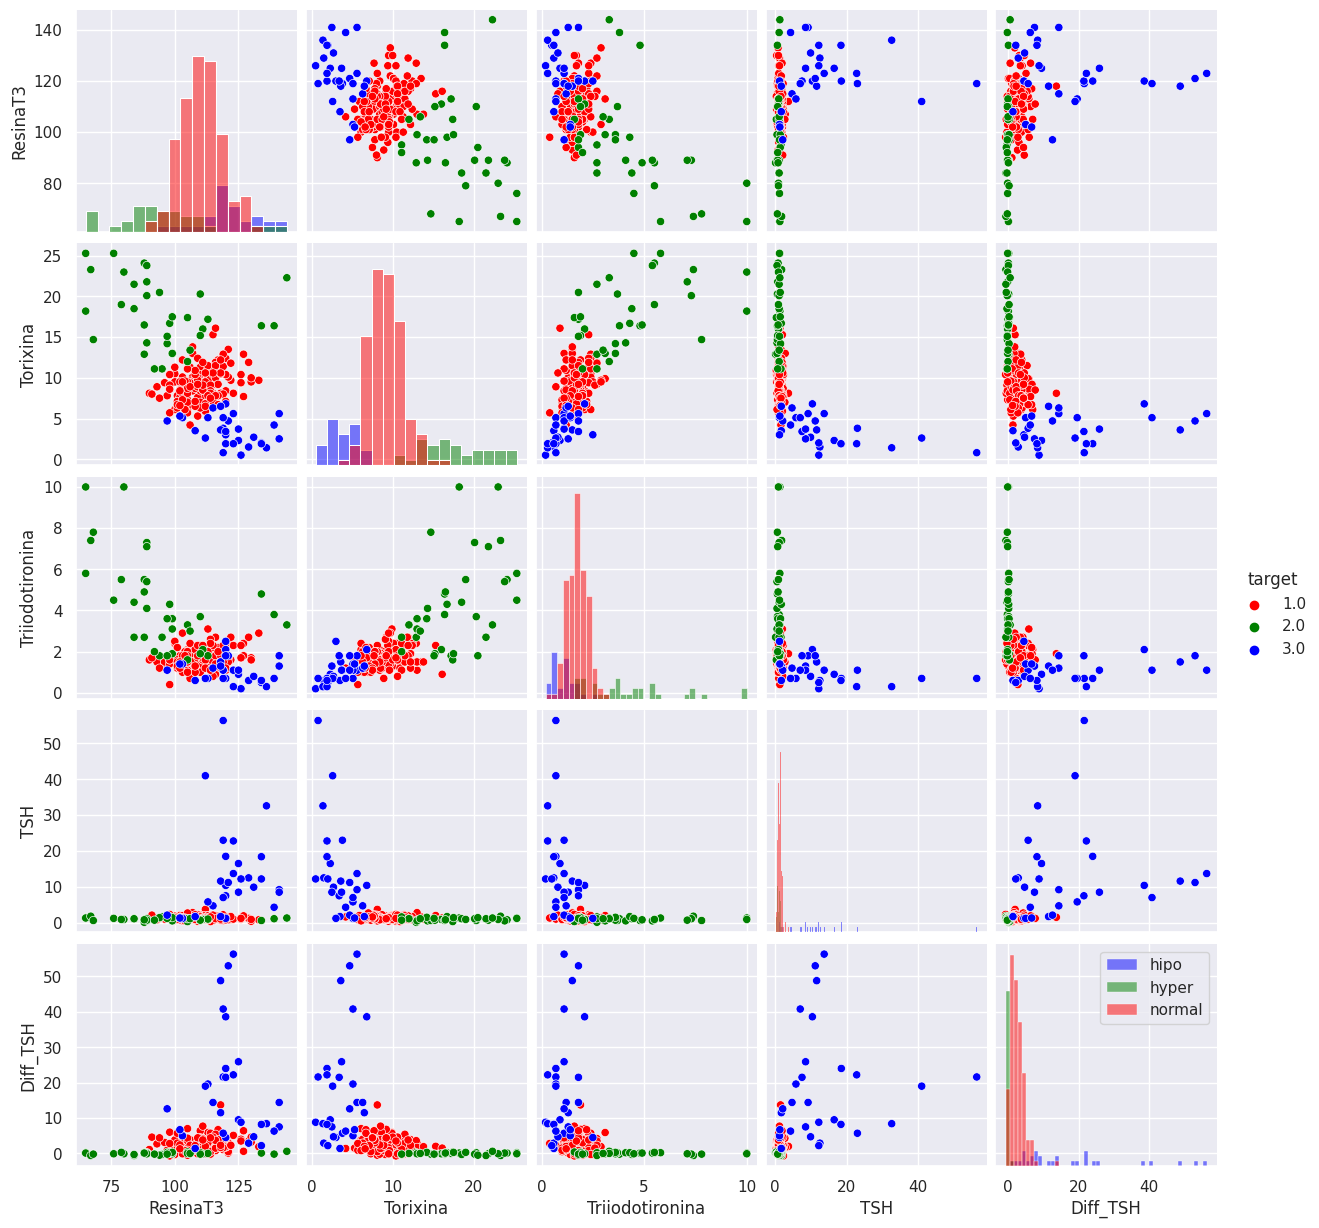

In [9]:
s = sns.pairplot(dataset, hue="target", diag_kind="hist",palette=['red','green','blue'])
plt.legend(labels=['hipo','hyper','normal'])
plt.show ()

In [28]:
#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr



#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

A dimensão do mapa foi baseada nos valores do pairplot que clusterizam melhor as classes.

In [29]:
m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2431449740603196


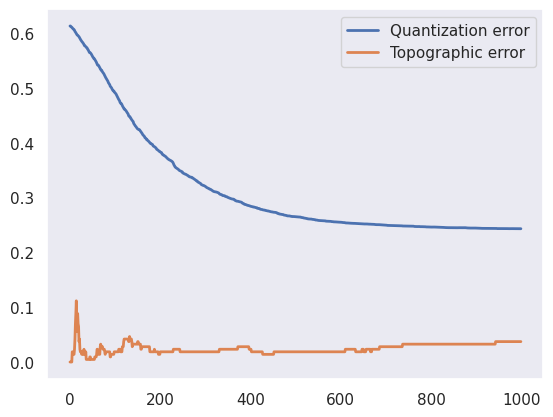

In [30]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)


plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.212523360063046


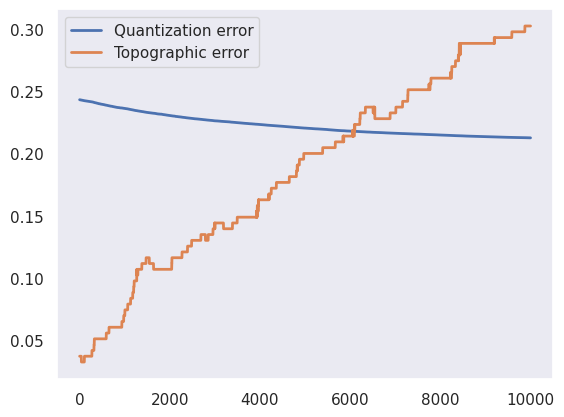

In [31]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning 

som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [32]:
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

0.28867513459481287
0.28867513459481287
0.28867513459481287
0.28867513459481287
0.28867513459481287


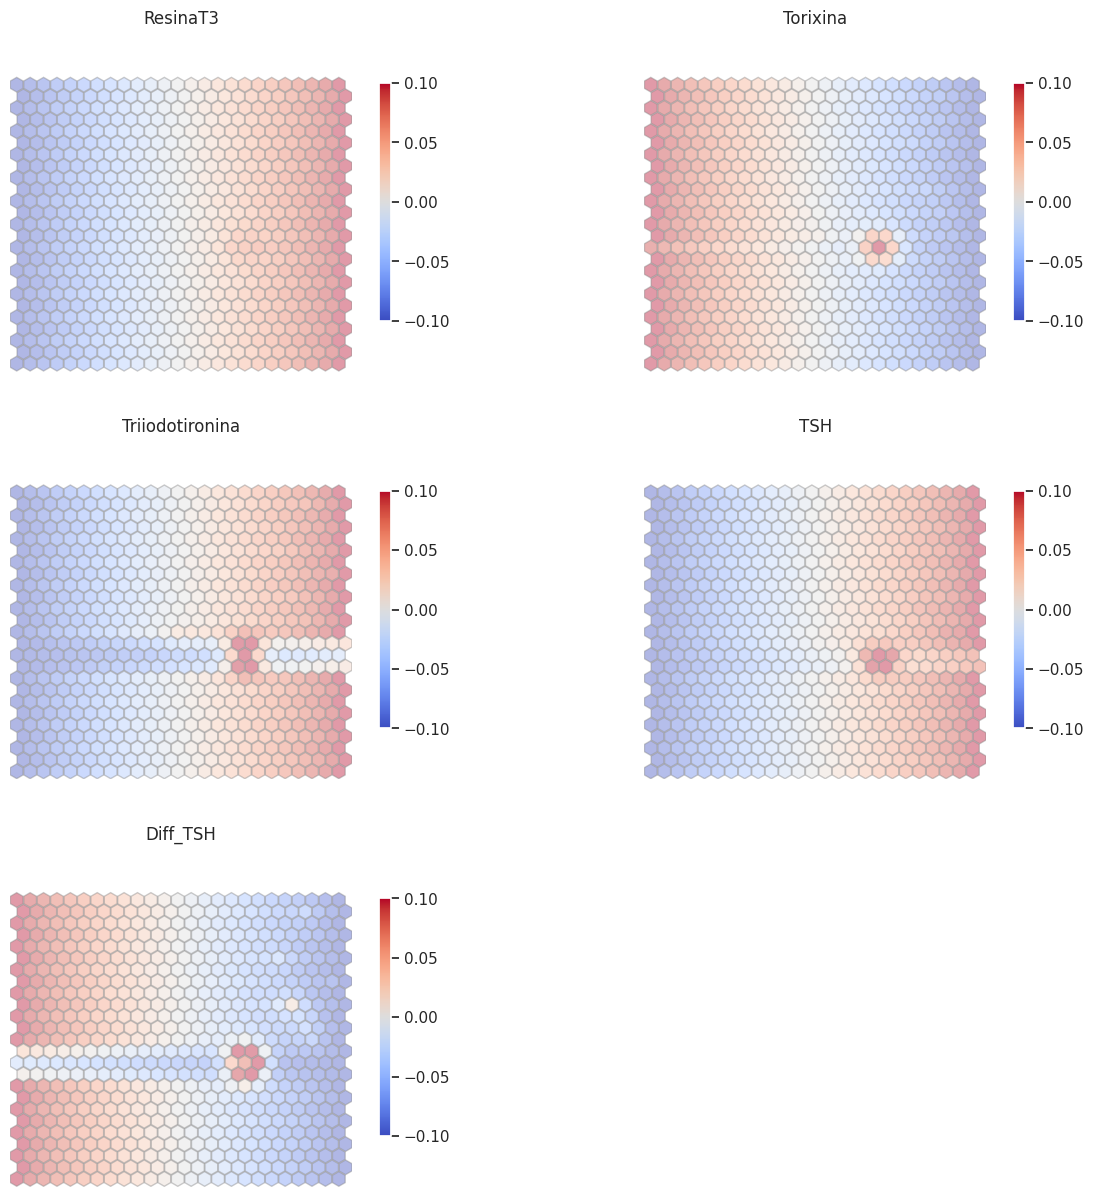

In [38]:
som.plot_map(nrows=3,ncols=2, feature_names=features_names)

0.28867513459481287


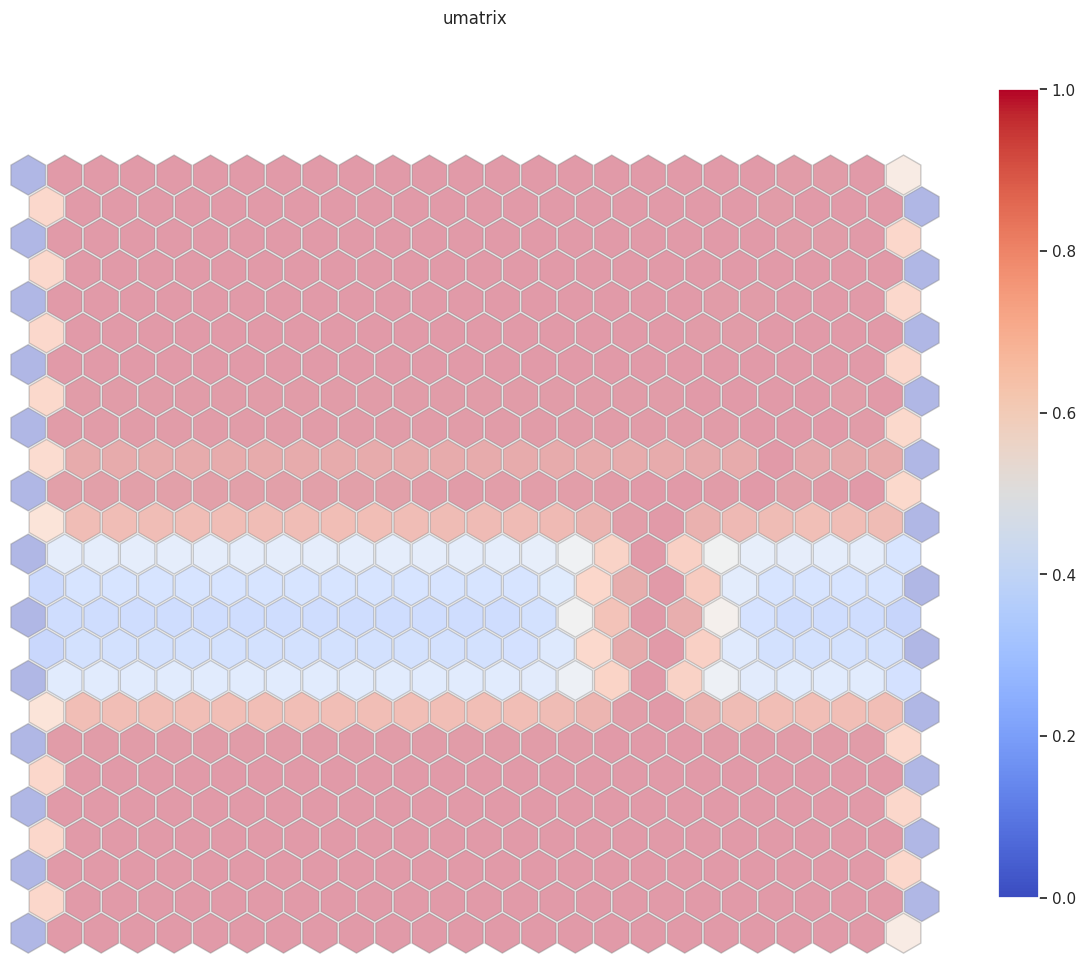

In [35]:
som.plot_umatrix()

Baseado no scaterplot, mudamos a dimensão para 25 em busca de uma melhor separação de dados. Fazendo  o mapa de calor para cada uma das características temosr a magnitude dos pessos associados a cada neurônio.
O erro quantitativo foi maior quando a taxa de aprendizado é igual a ordering phase do que finentuning phase.

##### 2. Modifique a topologia da rede. Teste diferentes valores e avalie o resultado.

In [43]:
m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "rectangular"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [44]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2414149352975945


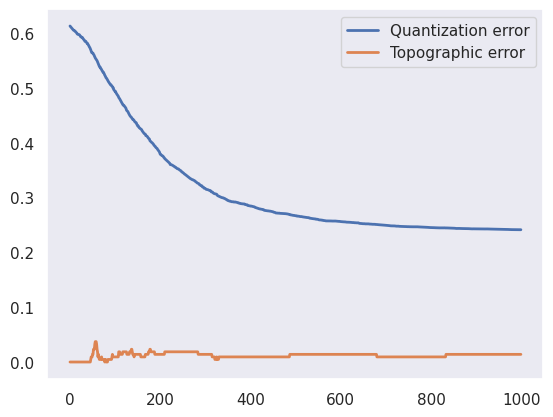

In [45]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [47]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning 

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.21149795827193482


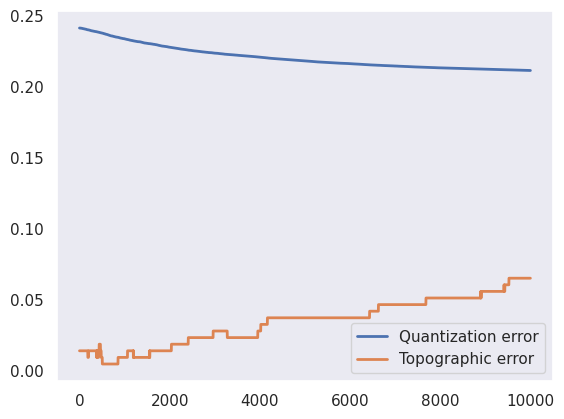

In [48]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [49]:
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

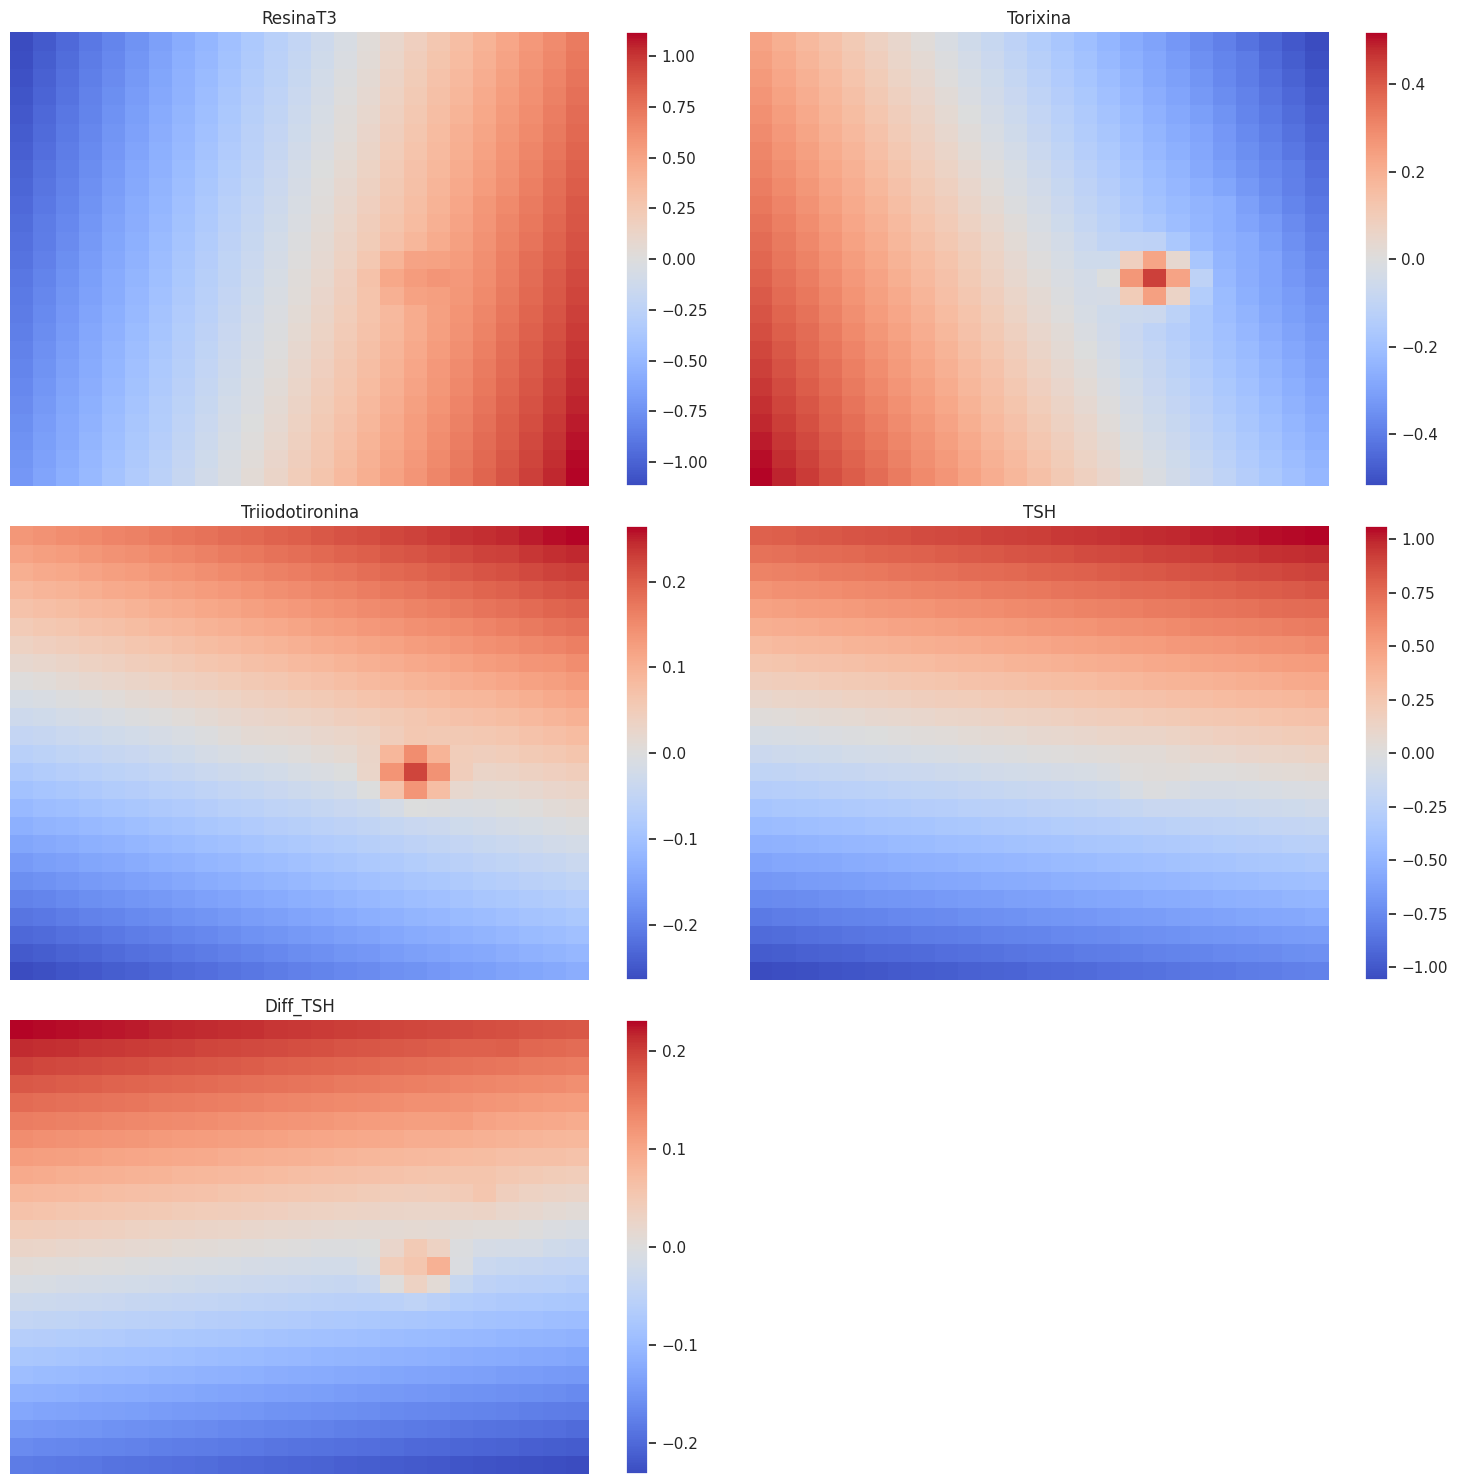

In [50]:
som.plot_map(nrows=3,ncols=2, feature_names=features_names)

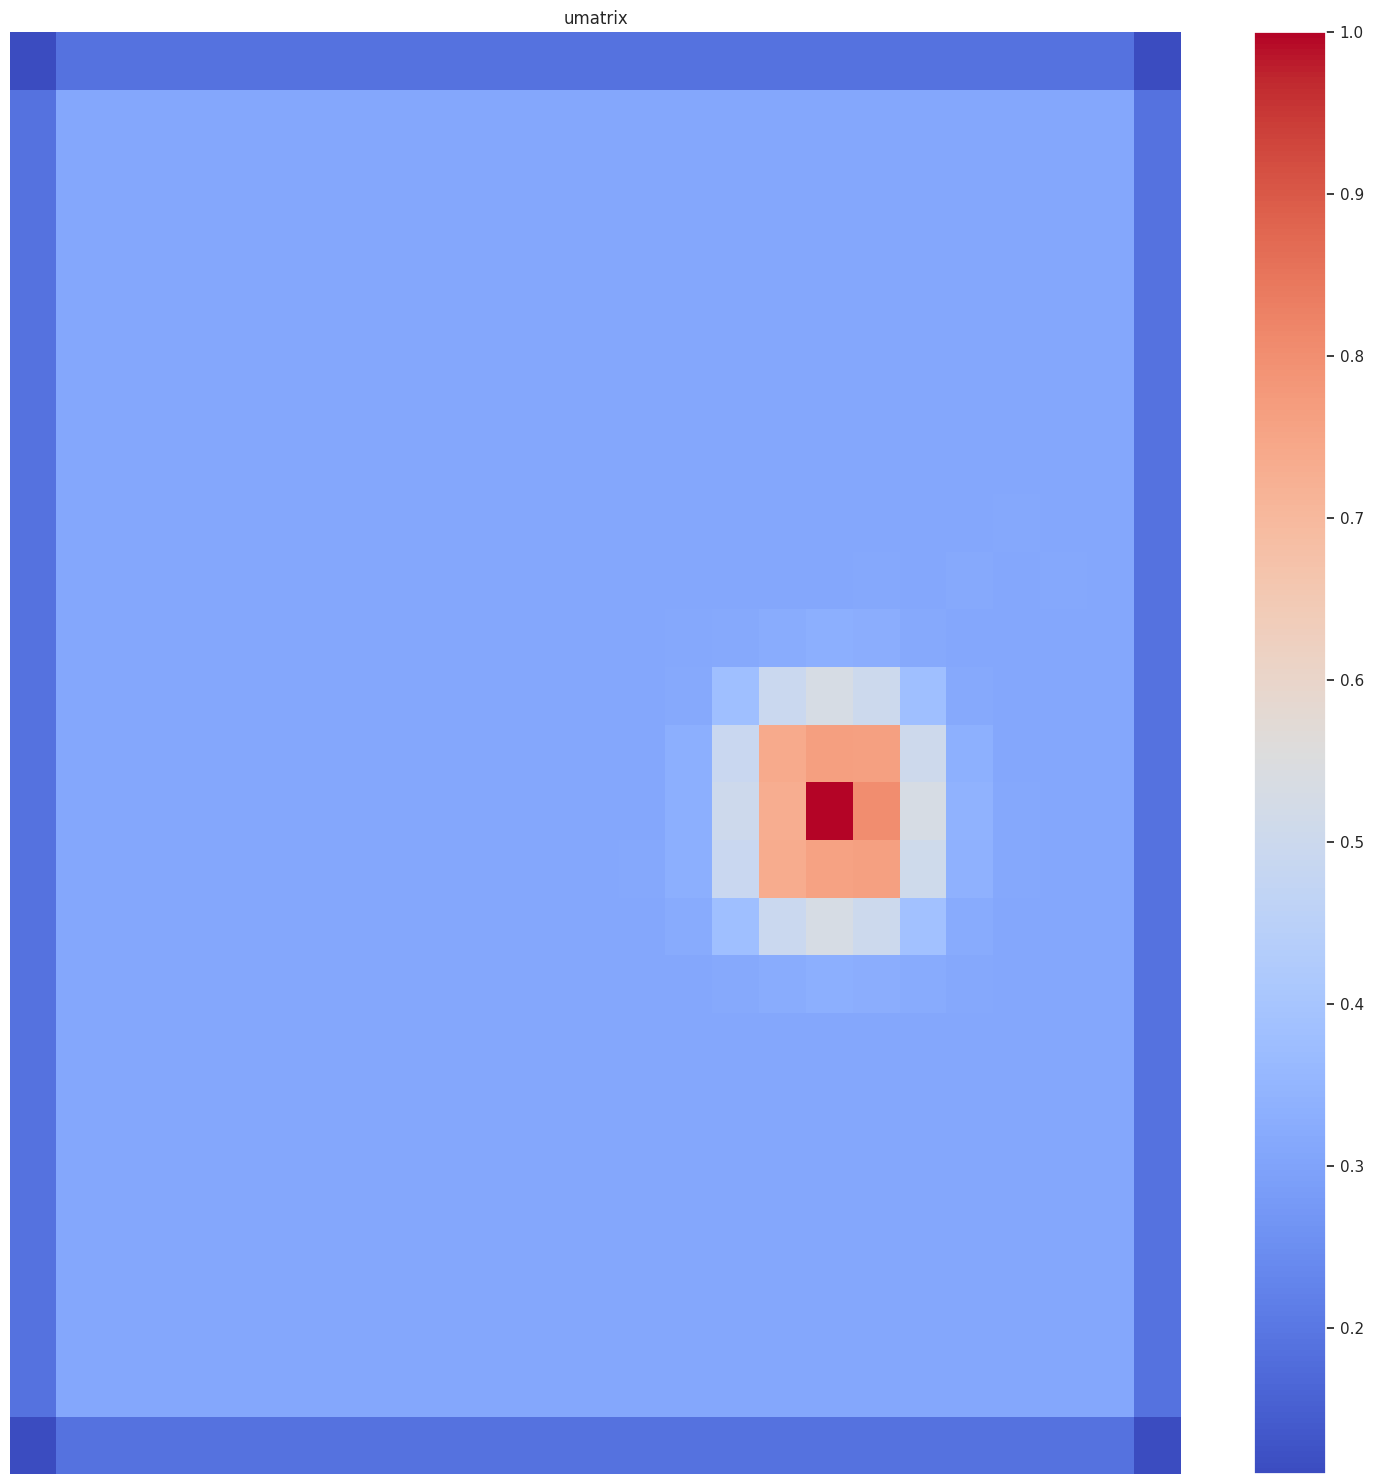

In [54]:
som.plot_umatrix()


A topologia foi alterada de hexagonal para rectangular e os outros parâmetros foram mantidos inalterados, não foi encontrada grande diferença entre os resultados testados.

##### 3. Modifique a normalização dos dados de entrada e avalie o resultado obtido. Esta mudança tem algum efeito no mapa gerado?

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
X = scaler.fit_transform(values)

In [59]:
m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

In [60]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.18246543358298


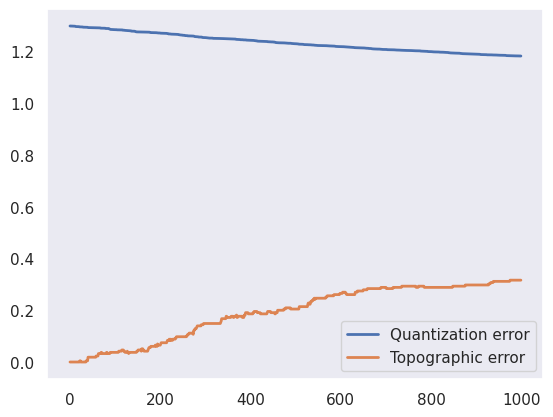

In [61]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [ ]:
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

0.28867513459481287
0.28867513459481287
0.28867513459481287
0.28867513459481287
0.28867513459481287


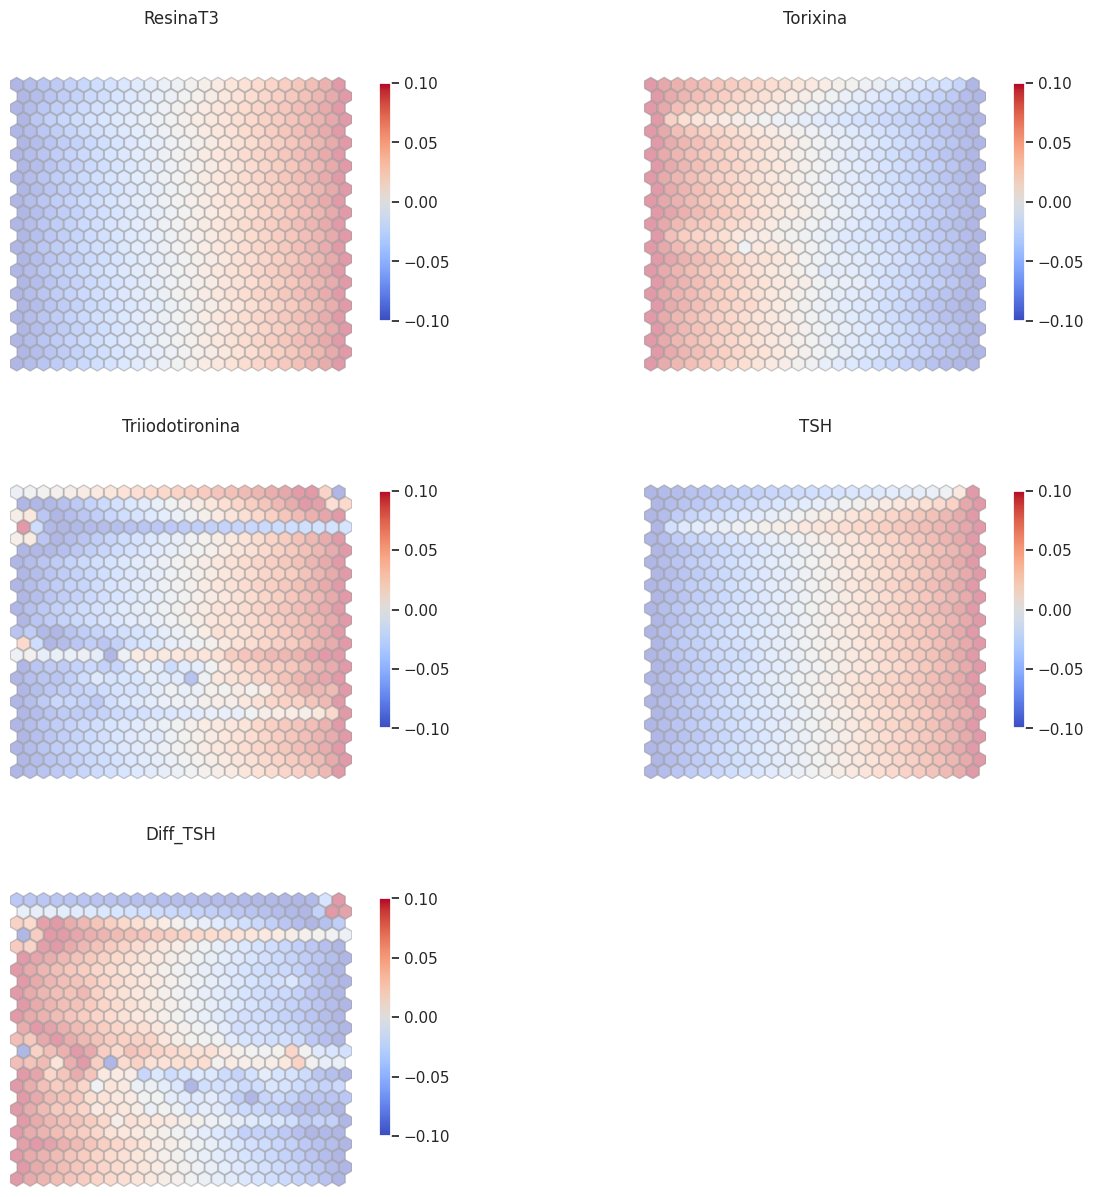

In [62]:
som.plot_map(nrows=3,ncols=2, feature_names=features_names)

0.28867513459481287


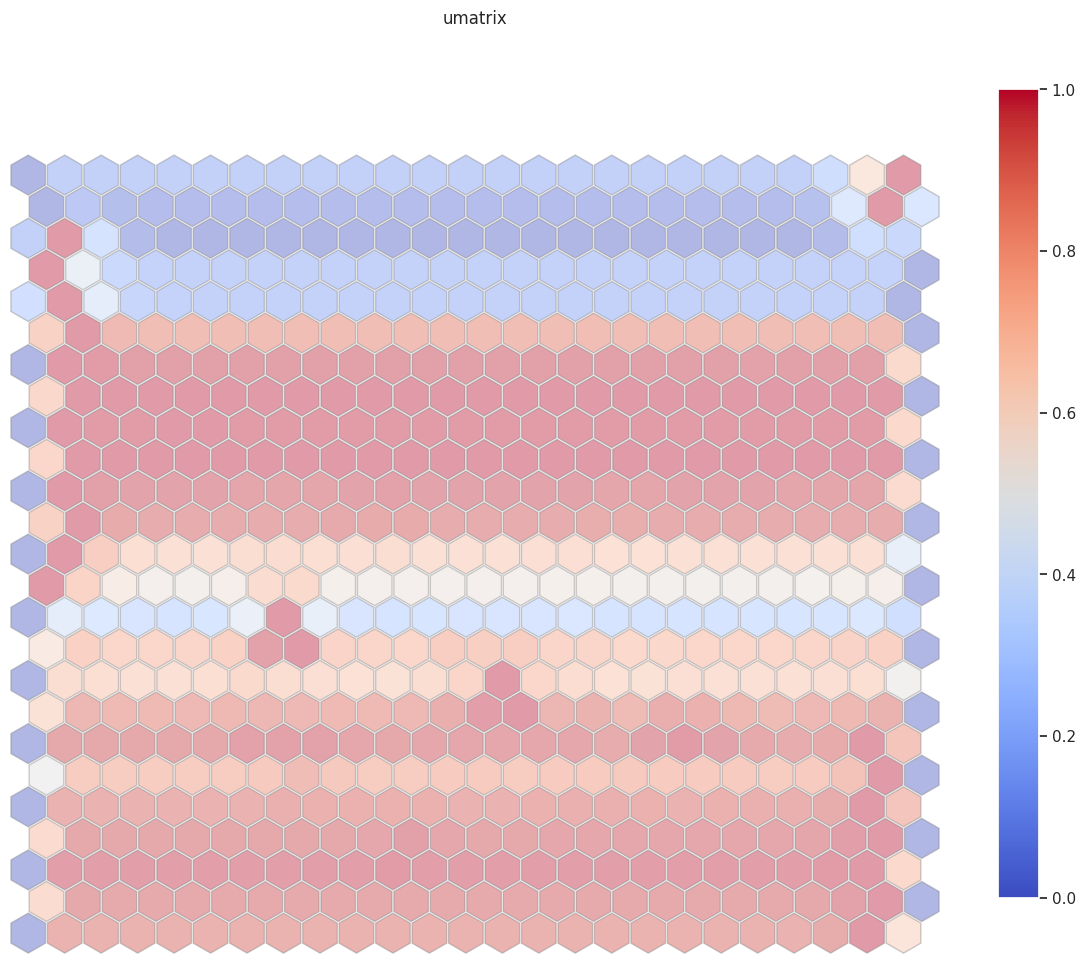

In [64]:
som.plot_umatrix()


Teve modificação mas gerou mais incertezas e grande diferenciação no mapa gerado

##### 4. Modifique o processo de treinamento durante a fase de ordenação. Avalie o resultado gerado.

In [65]:
def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [66]:
ordering_time = [10,100,500,1000,1500,2000,2500,5000,7500]
quantization_error = []
topographic_error = []


In [67]:
for y in range(0,len(ordering_time)):
  som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
  som.pca_weights_init(values)
  som.train_random(X, ordering_time[y], verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)
resultado = dict(ordering_time = ordering_time,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 10 / 10 ] 100% - 0:00:00 left 
 quantization error: 0.6081817600442694
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.5271581851211032
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.29874650053511714
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2410391325589683
 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.21941090581518977
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.20550980450584144
 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 0.19572469847729881
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.15870539329166736
 [ 7500 / 7500 ] 100% - 0:00:00 left 
 quantization error: 0.1411140745862725


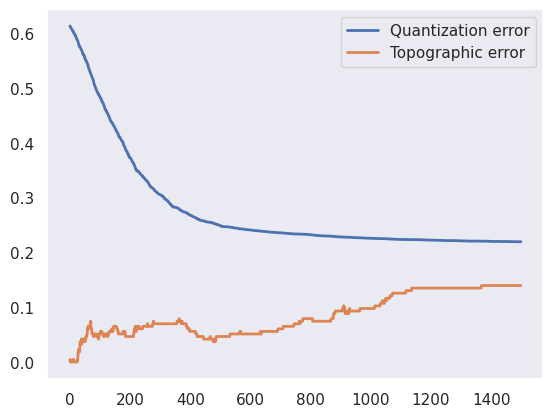

In [68]:
plt.plot(quantization_error[4],linewidth=2,label='Quantization error')
plt.plot(topographic_error[4],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

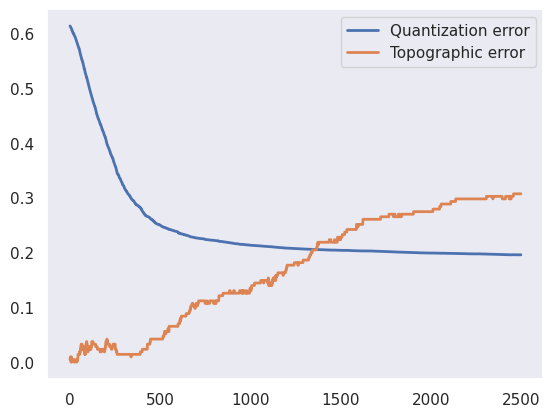

In [69]:
plt.plot(quantization_error[6],linewidth=2,label='Quantization error')
plt.plot(topographic_error[6],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

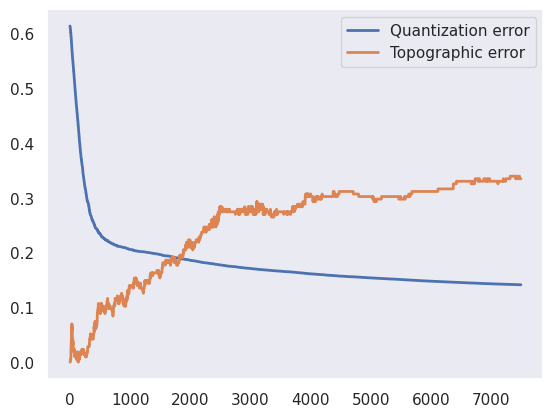

In [70]:
plt.plot(quantization_error[8],linewidth=2,label='Quantization error')
plt.plot(topographic_error[8],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Conforme voce aumenta o tempo de ordenamento o ganho decai então o valor que melhor utiliza o tempo de ordenamento é entre 1000 e 2000 pois não tem ganho na divisão entre os clusters

##### 5. Modifique o processo de treinamento durante a fase de ajuste fino. Avalie o resultado gerado.

In [71]:
m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1500
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [72]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.22594688278599817


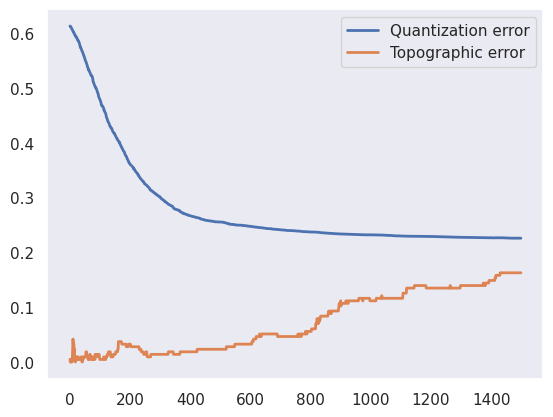

In [73]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [74]:
finetuning_time = [5000,10000,15000,20000,25000,30000,40000,50000,100000]
quantization_error = []
topographic_error = []

In [75]:
finetuning_time[8]

100000

In [76]:
for y in range(0,len(finetuning_time)):
  som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning 
  som.train_random(X, finetuning_time[y], verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)

resultado = dict(finetuning_time = finetuning_time,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.21078415697776307
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.19607130006220297
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.18267399878192234
 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 0.16424426703549544
 [ 25000 / 25000 ] 100% - 0:00:00 left 
 quantization error: 0.15117624369534582
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 0.1401259285991735
 [ 40000 / 40000 ] 100% - 0:00:00 left 
 quantization error: 0.12997680857945948
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.12253127394970773
 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.10493125085826895


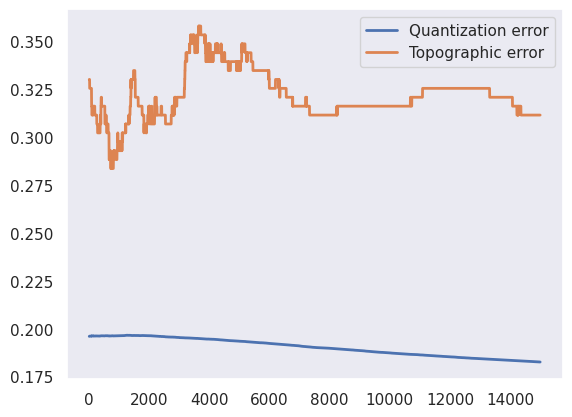

In [77]:
plt.plot(quantization_error[2],linewidth=2,label='Quantization error')
plt.plot(topographic_error[2],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

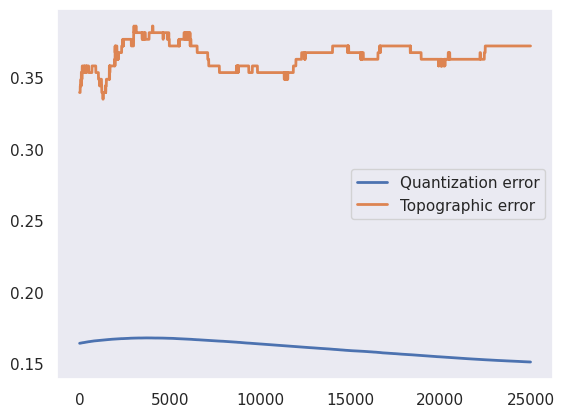

In [78]:
plt.plot(quantization_error[4],linewidth=2,label='Quantization error')
plt.plot(topographic_error[4],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

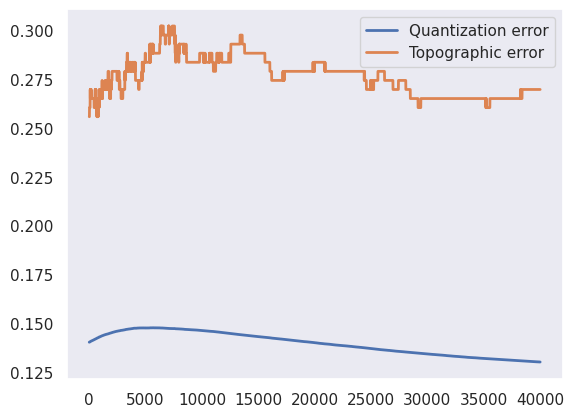

In [79]:
plt.plot(quantization_error[6],linewidth=2,label='Quantization error')
plt.plot(topographic_error[6],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

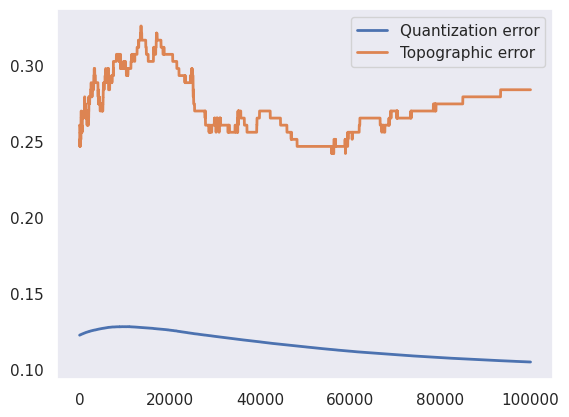

In [80]:
plt.plot(quantization_error[8],linewidth=2,label='Quantization error')
plt.plot(topographic_error[8],linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Há uma grande diferenciação em erro de topografia e quantização mas não há uma grande redução do erro topografico e após os 25000 de finetuning não há grande ganho na redução do erro de quantização

##### 6. Modifique a função de decaimento da taxa de aprendizado. Esta mudança gera algum impacto no mapa gerado? Justifique

In [81]:
#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    decay_rate = 0.1  # Taxa de decaimento

    new_lr = lr/(1 - actual_t/max_t) ** decay_rate

    return new_lr

In [82]:
m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "rectangular"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [83]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1958052605956002


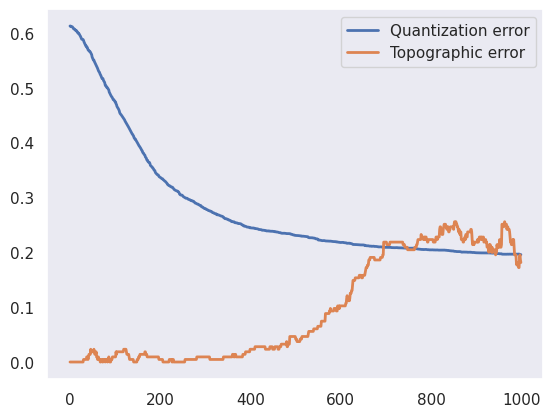

In [84]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [85]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning 

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1634694379215257


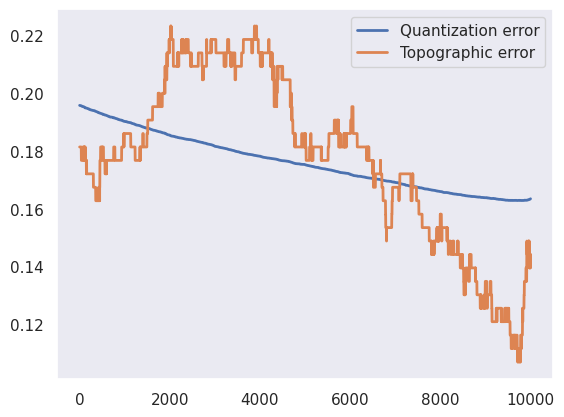

In [86]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

<ipython-input-87-96cc0763243b>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),


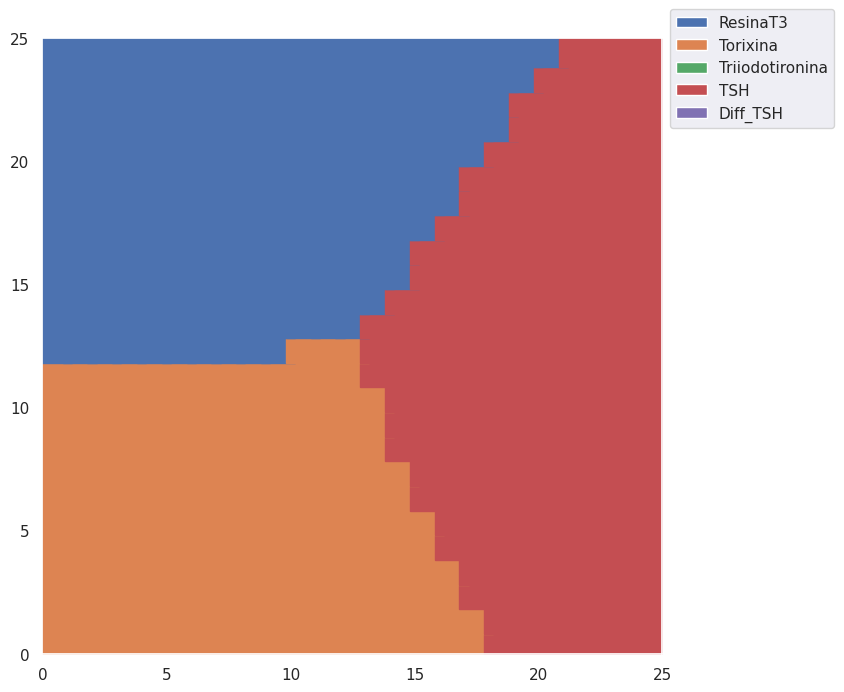

In [87]:
Z = np.zeros((m, n))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(features_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, m])
plt.ylim([0, n])
plt.show()

Foi feita uma função exponencial de decaimento onde se  utiliza uma taxa de decaimento e colocando essa taxa como expoente da função gerada. No teste gerado houve uma grande queda do erro topográfico enquanto o erro quantitativo se mantém estável caindo muito pouco do que a primeira função do decaimento

##### 7. Altere a função de vizinhança. Avalie o resultado.

In [88]:
#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [89]:
neighborhood_function = ['gaussian','mexican_hat','bubble','triangle']
quantization_error = []
topographic_error = []

In [90]:
for y in range(0,len(neighborhood_function)):
  som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn,neighborhood_function=neighborhood_function[y])
  som.pca_weights_init(values)
  som.train_random(X, ordering_time, verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)

resultado = dict(neighborhood_function = neighborhood_function,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.23997296368730173
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.24687361298041915
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.24626496289783556
 [    3 / 1000 ]   0% - 0:00:23 left 

/content/minisom/minisom.py:206: UserWarning: triangle neighborhood function does not take in account hexagonal topology
  warn('triangle neighborhood function does not ' +


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.32884700008149664


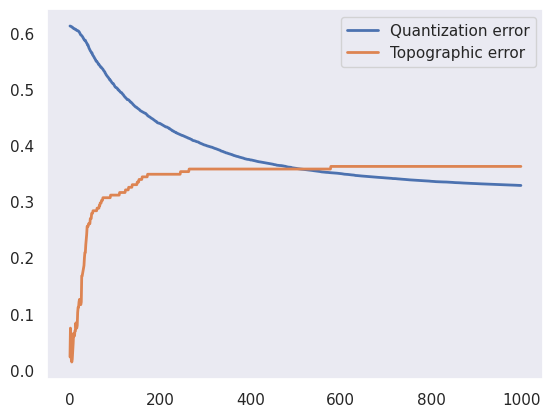

In [91]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [92]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning 

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2524233125860574


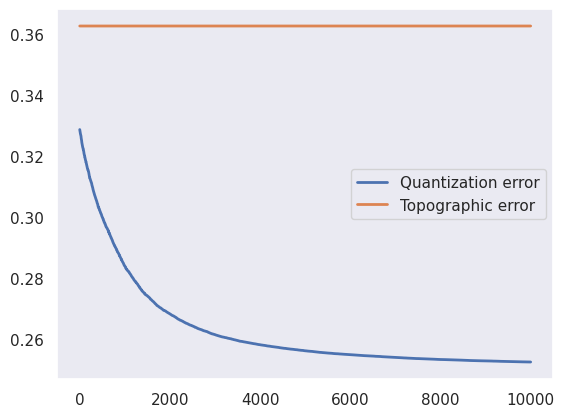

In [93]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Há um aumento no erro de quantização quando estamos utilizando a função de vizinhaça triangulo para o treinamento da base no SOM.
Enquanto as outras funções de vizinhaças temos pouca diferenciação no erro

## Parte 2 - Análise dos mapas

##### 1. Teste novas configurações para o modelo SOM para obter um melhor resultado. Justifique a escolha dos parâmetros do modelo selecionado.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
import concurrent.futures
import time
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig

In [95]:
#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    decay_rate = 0.1

    new_lr = lr/(1 - actual_t/max_t) ** decay_rate

    return new_lr


m = 25 #Dimensão X do mapa de Kohonen
n = 25 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.005 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "rectangular"

ordering_time = 5000
finetuning_time = 40000 
decay_fun =  decay_fcn 


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [96]:
best_params = fmin(
    fn = lambda sig: MiniSom(m,n,input_len=input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn).quantization_error(values),
    space = {
    'sig': hp.uniform('sig',0.001,5.0),
    'learning_rate': hp.uniform('learning_rate',0.001,1) },
    algo = tpe.suggest,
    verbose=1,
    max_evals = 100)
print("The best sigma value after 100 iterations is {}".format(best_params['sig']))
print("The best learning rate value after 100 iterations is {}".format(best_params['learning_rate']))

100%|██████████| 100/100 [00:00<00:00, 111.44trial/s, best loss: 109.74382135279687]
The best sigma value after 100 iterations is 3.041144151507087
The best learning rate value after 100 iterations is 0.5174045744460589


In [100]:
som = MiniSom(m,n,input_len,sigma=best_params['sig'],learning_rate=best_params['learning_rate'],topology=topology,decay_function=decay_fcn,neighborhood_function='gaussian')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.1485658668991493


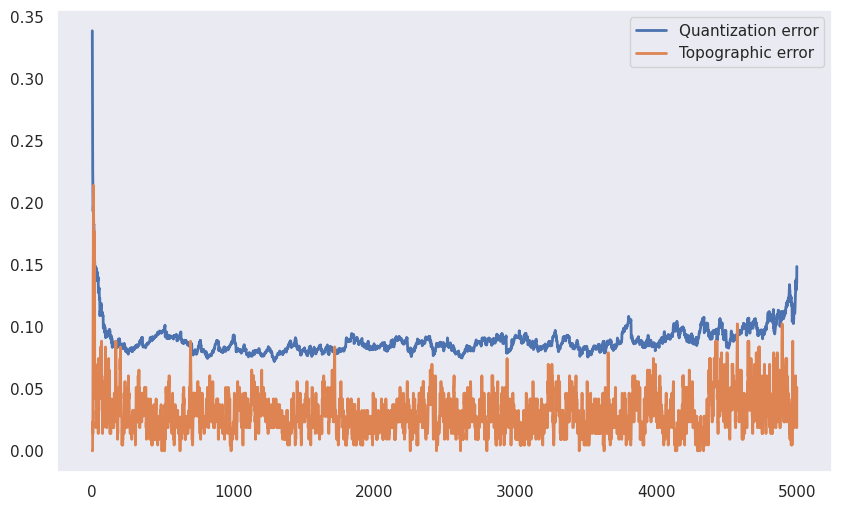

In [101]:
plt.figure(figsize=(10,6))
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()
plt.show()

In [102]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning 

som.train_random(X, finetuning_time, verbose=True)

 [ 40000 / 40000 ] 100% - 0:00:00 left 
 quantization error: 0.10240012868312506


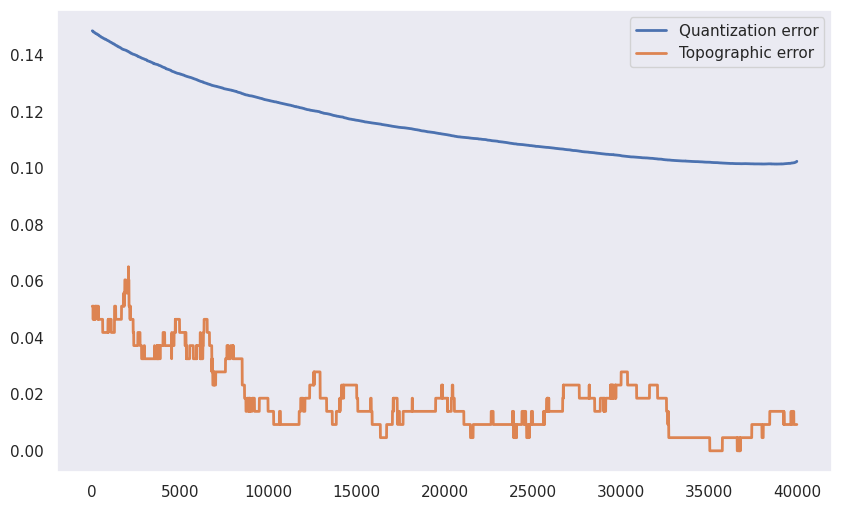

In [103]:
plt.figure(figsize=(10,6))
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Os parametros utilizados foram os seguintes:

*   Foram utilizados as dimensões de 25 pois foi o melhor resultado encontrado anteriormente.
*   Para encontrar o melhor resultado de Sigma e Learning Rate foram utilizados hiperparametros para conseguir um melhor número.
*   A topologia utilizada foi a rectangular pois teve um melhor resultado nos testes efetuados
*   A função de decaimento utilizada foi a exponencial pois teve um melhor resultado
*   A função de vizinhaça utilizada foi a gaussiana pois teve o melhor resutlado nos teste feitos acima

##### 2. Utilizando a melhor configuração do item anterior, analise os diferentes mapas fornecidos e caracterize os grupos de pacientes obtidos.

<ipython-input-104-3924d76198a0>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),


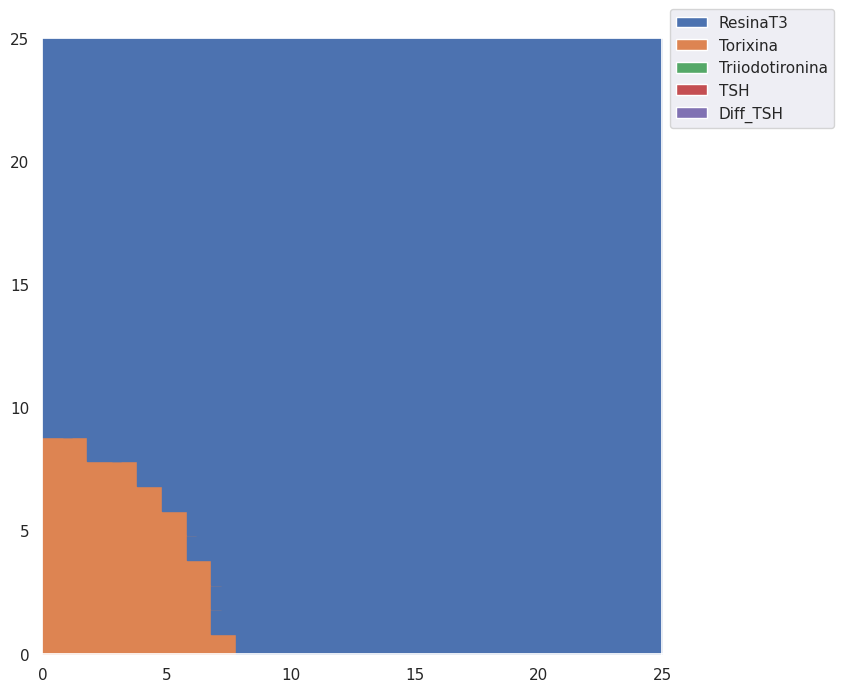

In [104]:
Z = np.zeros((m, n))
W = som.get_weights()
from matplotlib.patches import Patch
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(features_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, m])
plt.ylim([0, n])
plt.show()

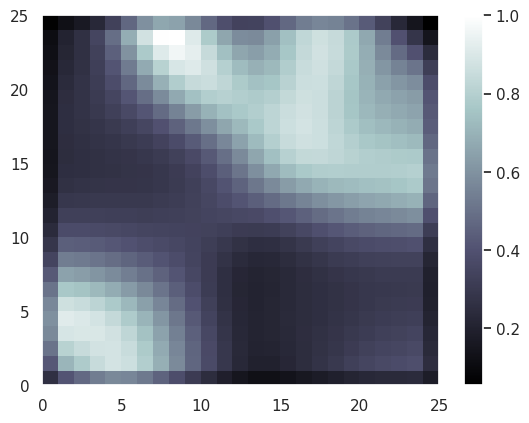

In [105]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()

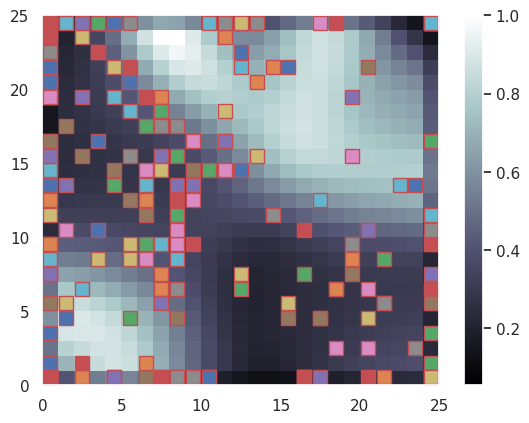

In [106]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = 's'
colors = 'r'
for i,x in enumerate (X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers,
       markeredgecolor = colors,
       markersize = 10)
show()

In [107]:
dataset['target'].value_counts()

1.0    150
2.0     35
3.0     30
Name: target, dtype: int64

In [108]:
dataset.groupby('target')['Torixina'].value_counts(bins=3).sort_index(ascending=False)

target  Torixina                  
3.0     (4.7, 6.8]                     9
        (2.6, 4.7]                    10
        (0.493, 2.6]                  11
2.0     (20.567, 25.3]                 9
        (15.833, 20.567]              14
        (11.085, 15.833]              12
1.0     (12.133, 16.1]                13
        (8.167, 12.133]               85
        (4.186999999999999, 8.167]    52
Name: Torixina, dtype: int64

In [109]:
dataset.groupby('target')['ResinaT3'].value_counts(bins=3).sort_index(ascending=False)

target  ResinaT3                    
3.0     (126.333, 141.0]                 8
        (111.667, 126.333]              18
        (96.955, 111.667]                4
2.0     (117.667, 144.0]                 3
        (91.333, 117.667]               16
        (64.92, 91.333]                 16
1.0     (118.667, 133.0]                23
        (104.333, 118.667]              94
        (89.95599999999999, 104.333]    33
Name: ResinaT3, dtype: int64

In [110]:
dataset.groupby('target')['Triiodotironina'].value_counts(bins=3).sort_index(ascending=False)

target  Triiodotironina          
3.0     (1.733, 2.5]                  5
        (0.967, 1.733]               11
        (0.197, 0.967]               14
2.0     (7.2, 10.0]                   5
        (4.4, 7.2]                    8
        (1.5910000000000002, 4.4]    22
1.0     (2.2, 3.1]                   24
        (1.3, 2.2]                   94
        (0.396, 1.3]                 32
Name: Triiodotironina, dtype: int64

In [111]:
dataset.groupby('target')['TSH'].value_counts(bins=3).sort_index(ascending=False)

target  TSH                       
3.0     (38.0, 56.4]                   2
        (19.6, 38.0]                   3
        (1.1440000000000001, 19.6]    25
2.0     (1.233, 1.8]                   9
        (0.667, 1.233]                18
        (0.0973, 0.667]                8
1.0     (2.567, 3.7]                   3
        (1.433, 2.567]                51
        (0.296, 1.433]                96
Name: TSH, dtype: int64

In [ ]:
dataset.groupby('target')['Diff_TSH'].value_counts(bins=3).sort_index(ascending=False)

target  Diff_TSH      
3.0     (38.0, 56.3]        5
        (19.7, 38.0]        5
        (1.344, 19.7]      20
2.0     (0.2, 0.6]         10
        (-0.2, 0.2]        14
        (-0.602, -0.2]     11
1.0     (8.9, 13.7]         1
        (4.1, 8.9]         25
        (-0.715, 4.1]     124
Name: Diff_TSH, dtype: int64

Os grupos gerados a partir do mapa podemos definir que:

*   Segundo os mapas gerados e os valores temos que o alto nivel do Diff TSH auxiliar a definir o grupo 3
*   Para o Grupo 1 definir que a principal métrica utilizada é o ResinaT3 onde os valores em média define estes grupos
*   No Grupo 2 o maior diferenciador é a métrica Triiodotironina que é o grupo entre 1.5 e 4.4 onde se define este grupo
